# Assignment 1: Time Series Forecast With Python (Seasonal ARIMA)

**Lecturer**: Vincent Claes<br>
**Authors:** Bryan Honof, Jeffrey Gorissen<br>
**Start Date:** 19/10/2018
    
**Objective:** Visualize and predict the future temperatures via ARIMA

**Description:** In this notebook we train our model

In [10]:
import math
import warnings
import datetime

import pandas            as pd
import itertools         as it
import statsmodels.api   as sm
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA

warnings.filterwarnings("ignore") # specify to ignore warning messages

In [11]:
data_csv = pd.read_csv('./data/rolmean_data.csv')
data = pd.DataFrame()

# Convert the creation_date column to datetime64
data['dateTime'] = pd.to_datetime(data_csv['dateTime'])
# Convert the value column to float
data['temperature'] = pd.to_numeric(data_csv['temperature'])

# Set the dateTime column as index
data = data.set_index(['dateTime'])

# Sort the dataFrame just to be sure...
data = data.sort_index()

data = data.dropna()

# Double check the results
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 901 entries, 2018-11-11 03:00:00 to 2018-11-20 12:00:00
Data columns (total 1 columns):
temperature    901 non-null float64
dtypes: float64(1)
memory usage: 14.1 KB


In [12]:
data.tail(5)

,temperature
dateTime,
2018-11-20 11:00:00,18.33
2018-11-20 11:15:00,18.19
2018-11-20 11:30:00,18.04
2018-11-20 11:45:00,17.84
2018-11-20 12:00:00,17.63


In [13]:
mod = ARIMA(data, order=(4, 1, 4))

results = mod.fit()

print(results.summary().tables[1])

                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0045      0.010     -0.469      0.639      -0.023       0.014
ar.L1.D.temperature     0.5482      0.043     12.796      0.000       0.464       0.632
ar.L2.D.temperature     0.5925      0.045     13.190      0.000       0.504       0.681
ar.L3.D.temperature     0.6229      0.034     18.304      0.000       0.556       0.690
ar.L4.D.temperature    -0.8523      0.033    -25.965      0.000      -0.917      -0.788
ma.L1.D.temperature    -0.2699      0.053     -5.064      0.000      -0.374      -0.165
ma.L2.D.temperature    -0.4110      0.068     -6.076      0.000      -0.544      -0.278
ma.L3.D.temperature    -0.5782      0.054    -10.792      0.000      -0.683      -0.473
ma.L4.D.temperature     0.5635      0.043     13.138      0.000       0.479       0.648


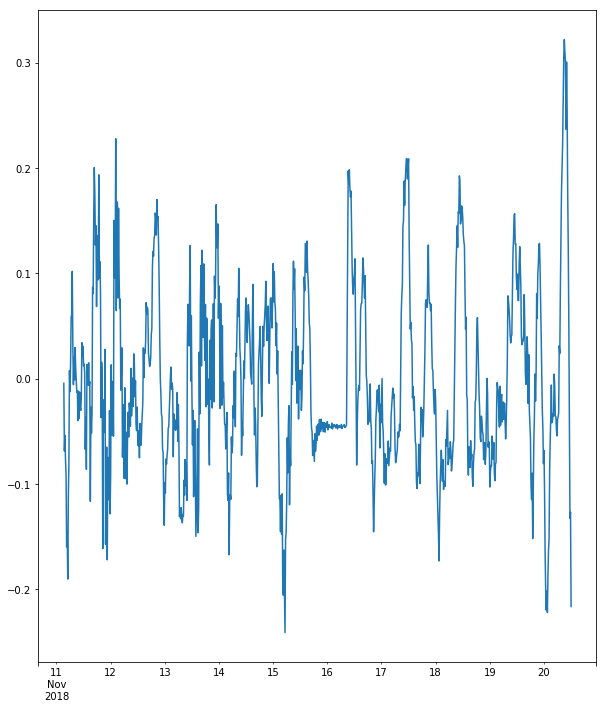

In [14]:
prediction = pd.DataFrame()
prediction = results.predict()

prediction.plot(figsize=(10, 12))
plt.show()

In [15]:
pred = results.predict()

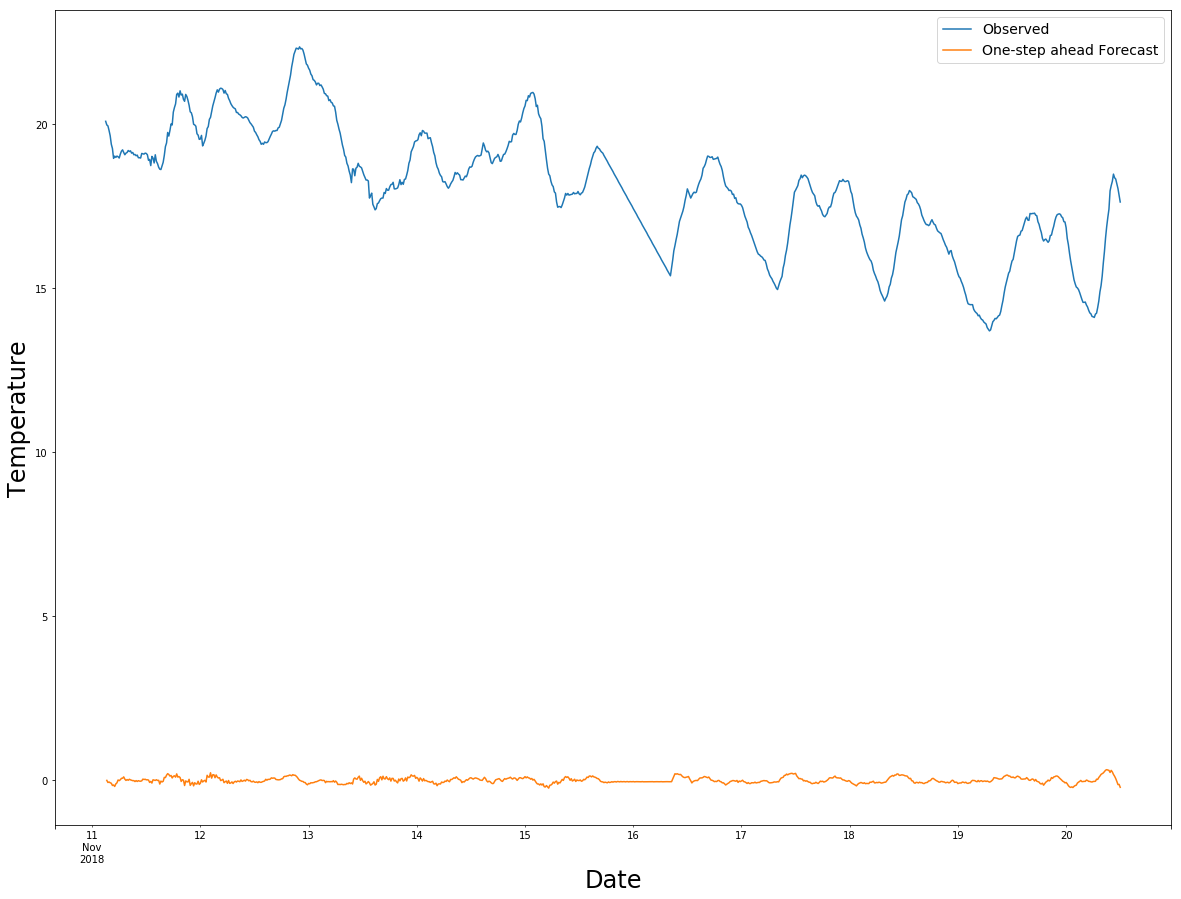

In [16]:
ax = data.temperature.plot(label='Observed', figsize=(20, 15))
pred.plot(ax=ax, label='One-step ahead Forecast')

ax.set_xlabel('Date', fontsize = 24)
ax.set_ylabel('Temperature', fontsize = 24)
plt.legend(fontsize = 14)

plt.show()